In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

## Exercise 2: Euler Method for dy/dt = -2y

#### Part (a): Implement Euler Method


In [13]:
"""  Fixed parameters for this specific problem:
        - f(t, y) = -2y (hardcoded derivative function)
        - t0 = 0 (initial time)
        - t_end = 1 (end time)
        - y0 = 1 (initial condition)
"""

def euler_method(f, y0, t0, t_end, h):
    """
    Euler method implementation
    
    Returns:
    t : array : time values
    y : array : numerical solution
    """
    
    # Create time array from t0 to t_end with step size h
    # We add h to t_end in arange to ensure we include the endpoint
    t = np.arange(t0, t_end + h, h)
    
    y = np.zeros(len(t)) # Initialize solution array with zeros
    y[0] = y0 # Set initial condition
    
    # Euler iteration loop
    for i in range(1, len(t)):
        # Calculate next value using Euler formula:
        # y_new = y_old + h * f(t_old, y_old)
        y[i] = y[i-1] + h * f(t[i-1], y[i-1])
    return t, y

f = lambda t, y: -2 * y
y0 = 1
t0, t_end = 0, 1

t_01, y_01 = euler_method(f, y0, t0, t_end, 0.1)
t_001, y_001 = euler_method(f, y0, t0, t_end, 0.01)

#### Part (b): Plot Solutions

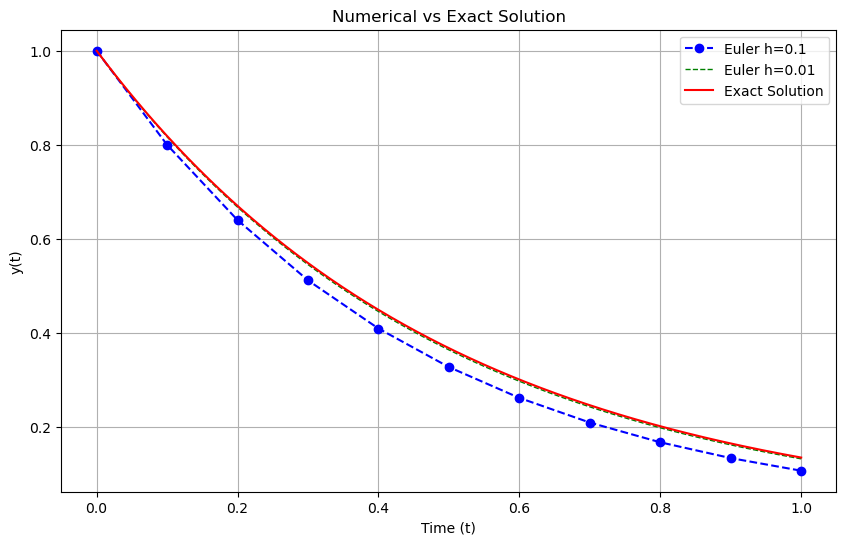

In [14]:
# Generate exact solution
exact_t = np.linspace(0, 1, 1000)
exact_y = np.exp(-2 * exact_t)  # y(t) = e^(-2t)

# Plot all solutions
plt.figure(figsize=(10, 6))
plt.plot(t_01, y_01, 'bo--', markersize=6, label='Euler h=0.1')
plt.plot(t_001, y_001, 'g--', linewidth=1, label='Euler h=0.01')
plt.plot(exact_t, exact_y, 'r-', label='Exact Solution')
plt.title('Numerical vs Exact Solution')
plt.xlabel('Time (t)')
plt.ylabel('y(t)')
plt.legend()
plt.grid(True)
plt.show()

#### Part (c): Error Analysis

In [18]:
# Calculate errors

exact_t1 = np.exp(-2) # Get exact value at t = 1

# Calculate absolute errors at final time point
error_01 = abs(y_01[-1] - exact_t1)
error_001 = abs(y_001[-1] - exact_t1)

print("Error Analysis:")
print(f'Error at t=1 (h=0.1): {error_01:.6f}')
print(f'Error at t=1 (h=0.01): {error_001:.6f}')
print(f'Error ratio: {error_01/error_001:.2f}')

# Calculate RMSE over entire solution
def calculate_rmse(numerical_t, numerical_y):
    """Calculate root mean square error against exact solution"""
    exact_values = np.exp(-2 * numerical_t)
    return np.sqrt(np.mean((exact_values - numerical_y)**2))

print("\nRMSE Analysis:")
print(f"RMSE (h=0.1):  {calculate_rmse(t_01, y_01):.6f}")
print(f"RMSE (h=0.01): {calculate_rmse(t_001, y_001):.6f}")

Error Analysis:
Error at t=1 (h=0.1): 0.027961
Error at t=1 (h=0.01): 0.002716
Error ratio: 10.30

RMSE Analysis:
RMSE (h=0.1):  0.032498
RMSE (h=0.01): 0.003101


## Exercise 3: Lorenz System

#### Implement Euler Method for Lorenz System

In [ ]:
def euler_system(f_system, initial_state, t0, t_end, h):
    """
    Euler method for systems of ODEs
    Parameters:
    f_system : function(t, state) that returns derivatives
    initial_state : array-like [x0, y0, z0]
    t0 : start time
    t_end : end time
    h : step size
    
    Returns:
    t : array of time values
    states : 2D array of solution states [x, y, z] at each time
    """
    # Create time array
    t = np.arange(t0, t_end + h, h)
    num_steps = len(t)
    
    # Initialize state array (each row contains [x, y, z] at time step)
    states = np.zeros((num_steps, len(initial_state)))
    states[0] = initial_state
    
    # Euler iteration
    for i in range(1, num_steps):
        derivatives = f_system(t[i-1], states[i-1])
        states[i] = states[i-1] + h * np.array(derivatives)
    
    return t, states

# Define Lorenz system equations
def lorenz_system(t, state):
    """
    Parameters:
    t : float - time
    state : array-like [x, y, z] - current state
    
    Returns:
    [dxdt, dydt, dzdt] : derivatives at current state
    """
    sigma = 10.0
    rho = 28.0
    beta = 8.0/3.0
    
    x, y, z = state  # Unpack current state
    
    dxdt = sigma * (y - x) 
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    
    return [dxdt, dydt, dzdt]
  


initial_conditions = [1.0, 0.0, 0.0]  # [x0, y0, z0]
t0 = 0.0
t_end = 10.0
h = 0.01

# Solve using Euler method
t, states = euler_system(lorenz_system, initial_conditions, t0, t_end, h)

# Extract components from state matrix
x = states[:, 0]
y = states[:, 1]
z = states[:, 2]


#### 3D Plot

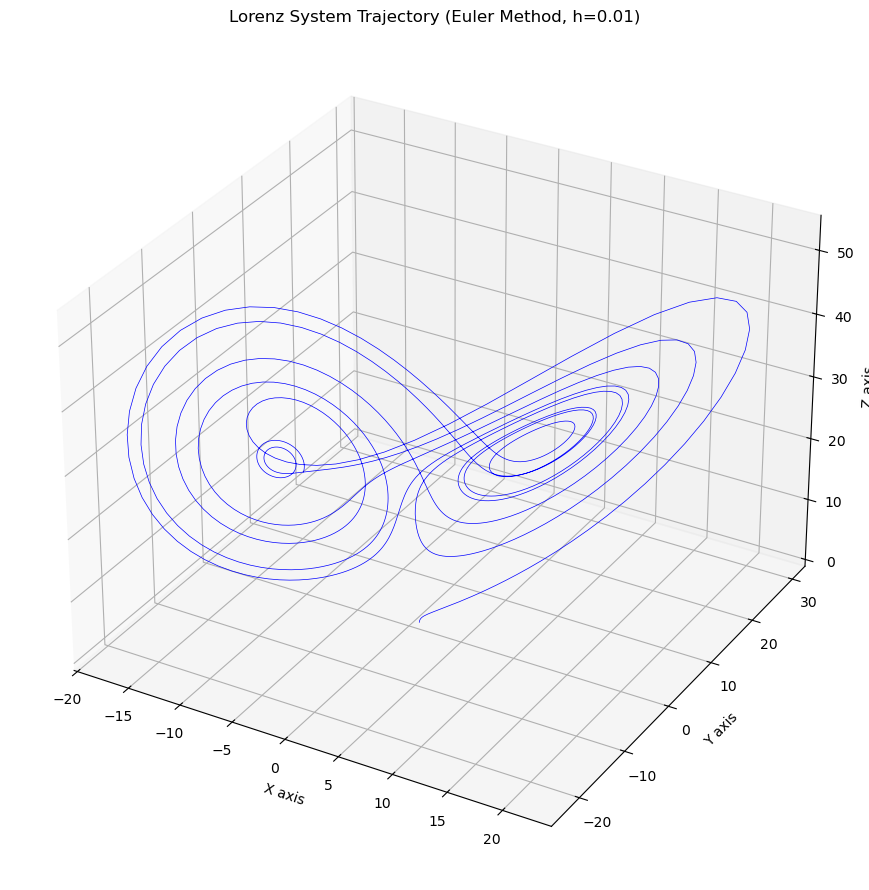

In [4]:
plt.figure(figsize=(12, 9))
ax = plt.axes(projection='3d')

# Plot the trajectory with thin line
ax.plot(x, y, z, lw=0.5, color='blue')

# Add labels and title
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('Lorenz System Trajectory (Euler Method, h=0.01)')

# Set viewing angle for better visualization
ax.view_init(30, -60)  # (elevation, azimuth) in degrees

plt.tight_layout()
plt.show()